# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](images/coins.png)

as follows:

![coins classification](images/coins_classification.png)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

(718, 957, 3)


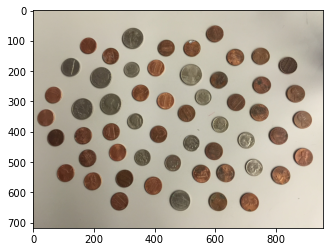

In [2]:
coins = cv2.imread('images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

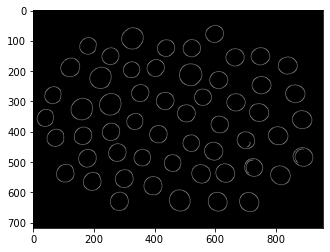

In [3]:
coins_copy = np.copy(coins)

# TO DO: Obtain a characteristic and plot it.

# Convert to grayscale
gray_coins = cv2.cvtColor(coins_copy, cv2.COLOR_RGB2GRAY)

# Blur image to remove noise
coins_blur = cv2.GaussianBlur(gray_coins, (11,11), 0)

# Get edges using Canny and generate a binary image
coins_edges = cv2.Canny(coins_blur, 25, 200)

retval, binary = cv2.threshold(coins_edges, 0, 255, cv2.THRESH_TOZERO)
binary = cv2.dilate(binary, np.ones((1,1)), iterations = 1)

plt.imshow(binary, cmap="gray")

2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

112


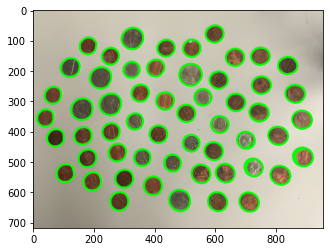

In [4]:
# TO DO: Plot an image of the contours of the coins.

(contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(coins_copy, contours, -1, (0,255,0), 5)

plt.imshow(all_contours)

print(len(contours))


3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

In [5]:
# TO DO: Obtain a useful contour feature to clasify the coins.

colorful_coins = np.copy(all_contours)

large_coins = []
smaller_coins = []
smallest_coins = []


for idx,selected_contour in enumerate(contours):
    if(selected_contour is not None):
        area = cv2.arcLength(selected_contour, True)

        moments = cv2.moments(selected_contour)
        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])

        if(area > 200):
            large_coins.append(selected_contour)
            cv2.circle(colorful_coins, (cx, cy), 5, (0, 255, 0), -1)
            cv2.putText(colorful_coins, str("5"), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2, cv2.LINE_8)

        elif(180 < area < 200):
            smaller_coins.append(selected_contour)
            cv2.circle(colorful_coins, (cx, cy), 5, (0, 255, 0), -1)
            cv2.putText(colorful_coins, str("0.5"), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2, cv2.LINE_8)


        else:
            smallest_coins.append(selected_contour)
            cv2.circle(colorful_coins, (cx, cy), 5, (0, 255, 0), -1)
            cv2.putText(colorful_coins, str("1"), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 2, cv2.LINE_8)


4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

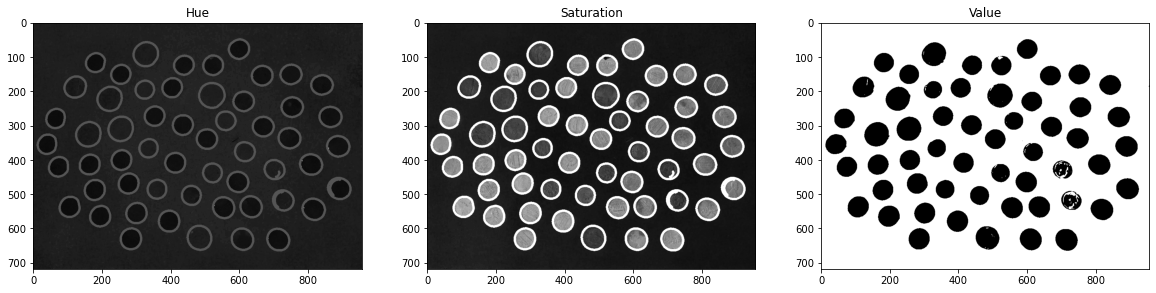

In [6]:
# TO DO: Obtain the average color of each coin, and store it for future use.

# Convert from RGB to HSV
hsv = cv2.cvtColor(coins_copy, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

hsv = cv2.cvtColor(coins, cv2.COLOR_RGB2HSV)
blurred_coins = cv2.GaussianBlur(hsv, (5, 5), 0)
lower_blue = np.array([10, 10, 120])
upper_blue = np.array([50, 50, 255])
# mask on red channel
mask = cv2.inRange(blurred_coins, lower_blue, upper_blue)

plt.imshow(mask, cmap='gray')

In [7]:
# We will use Saturation and filter the silver coins

# Define our color selection criteria in HSV values
lower_blue = np.array([10, 10, 120])
upper_blue = np.array([50, 50, 255])

# Define the masked area in RGB space
mask = cv2.inRange(blurred_coins, lower_blue, upper_blue)

# mask the image
masked_image = np.copy(coins_copy)
masked_image[mask==0] = [0,0,0]

# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_blue, upper_blue)

# mask the image
masked_image = np.copy(coins_copy)
masked_image[mask_hsv==0] = [0,0,0]

small_copper = []
small_silver = []

for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        average_color_row = np.average(hsv, axis=0)
        average_color = np.average(average_color_row, axis=0)

        if(average_color[1] > 64):
            small_silver.append(selected_contour)

        else:
            small_copper.append(selected_contour)


5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

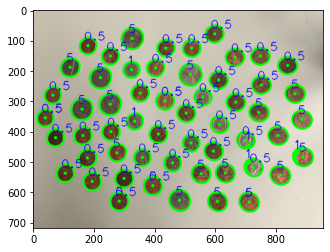

In [8]:
# TO DO: Using the dictionaries that you created, plot an image with the correct coin values

plt.imshow(colorful_coins)